In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv").set_index("RowNumber")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [3]:
df.isnull().any()

CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
unnecassary_columns = ["Surname", "CustomerId"]
df = df.drop(columns=unnecassary_columns, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited'>

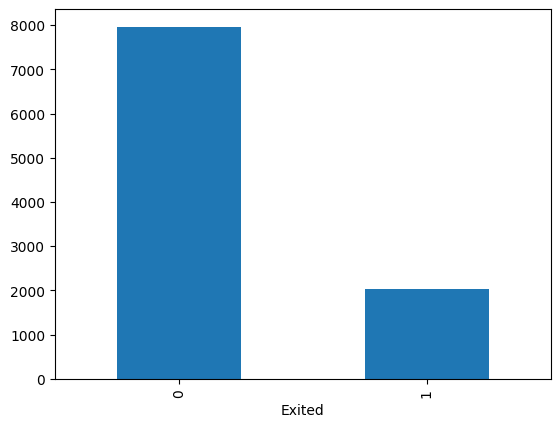

In [7]:
print(df['Exited'].value_counts())
df['Exited'].value_counts().plot(kind='bar')

In [8]:
print("Gender : ", df['Gender'].unique())
print("Geography : ", df['Geography'].unique())

Gender :  ['Female' 'Male']
Geography :  ['France' 'Spain' 'Germany']


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_col = ['Gender', 'Geography']

for col in cat_col:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)

['Female' 'Male']
['France' 'Germany' 'Spain']


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

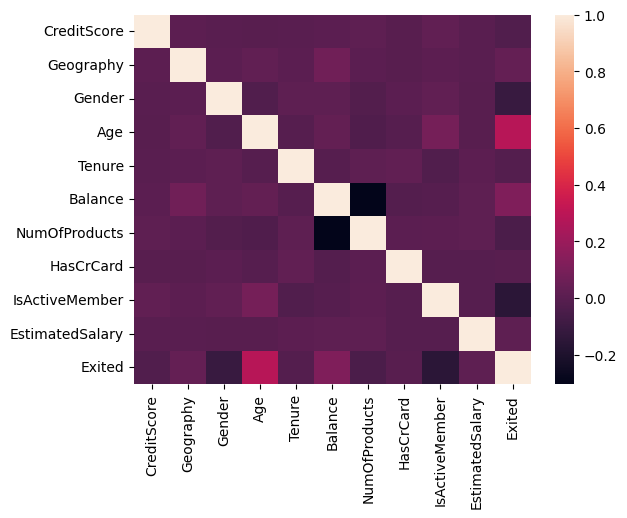

In [11]:
sns.heatmap(df.corr(), fmt='.2g')

Text(0.5, 1.0, 'Age Distribution')

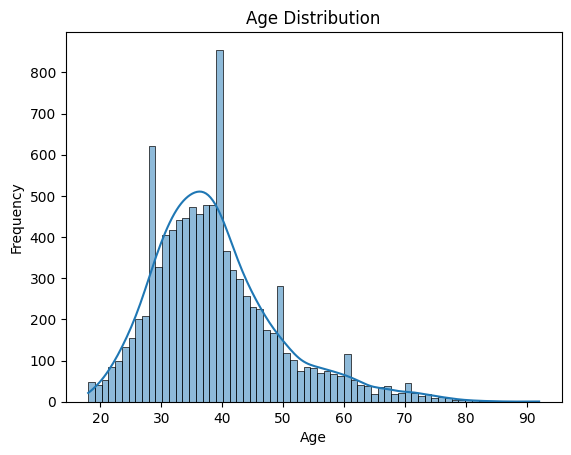

In [12]:
sns.histplot(df['Age'], kde=True)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Balance Distribution')

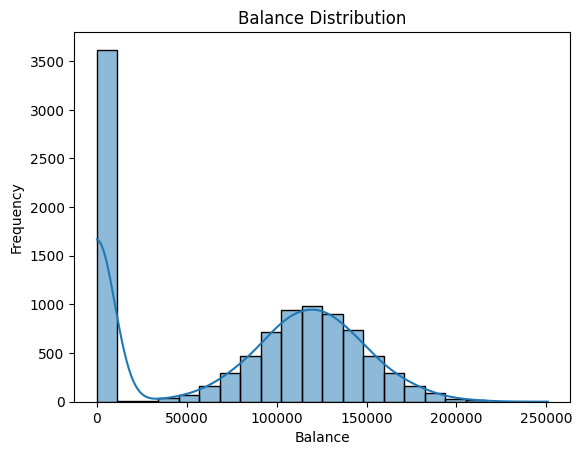

In [13]:
sns.histplot(df['Balance'], kde=True)
plt.ylabel('Frequency')
plt.xlabel('Balance')
plt.title('Balance Distribution')

<Axes: xlabel='CreditScore', ylabel='Count'>

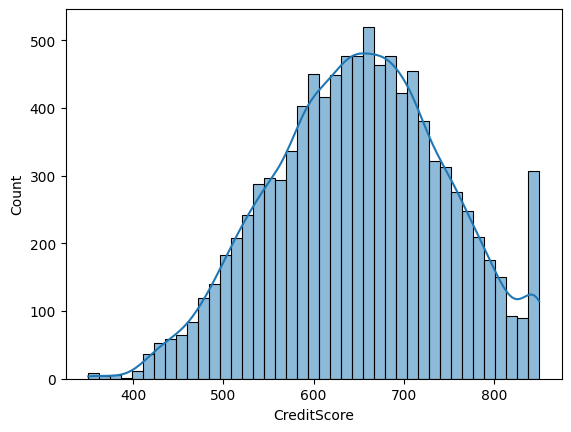

In [14]:
sns.histplot(df['CreditScore'], kde=True)

Gender
1    5457
0    4543
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

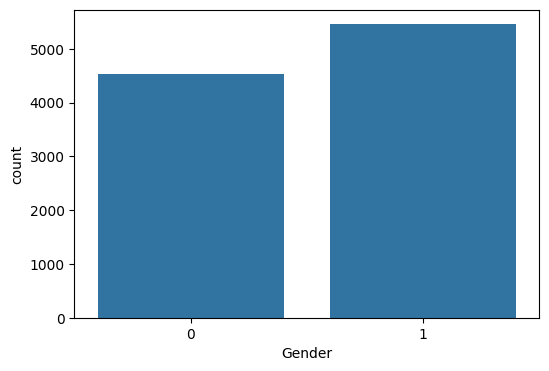

In [15]:
plt.figure(figsize=(6, 4))
print(df['Gender'].value_counts())
sns.countplot(x=df['Gender'])

# Train The Model

In [16]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Classifier 

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred) * 100 , " %")

Accuracy Score :  77.8  %


## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred) * 100 , " %")

Accuracy Score :  86.75  %


## Support Vector Machine 

In [20]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred) * 100 , " %")

Accuracy Score :  80.35  %


## XGBoost

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred) * 100 , " %")

Accuracy Score :  86.1  %


### Visualize Random Forest Classifier and XGBoost Classifier Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
# Random Forest Classifier 

y_pred = random_forest.predict(X_test)

print("Classification Report : \n", classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8675')

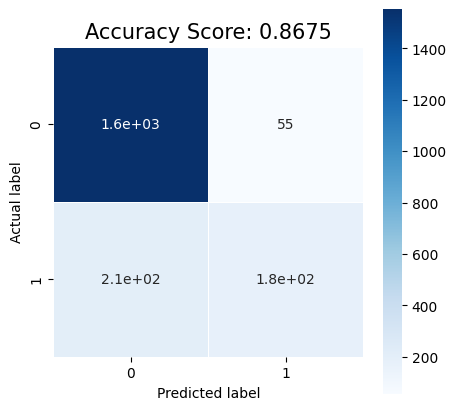

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

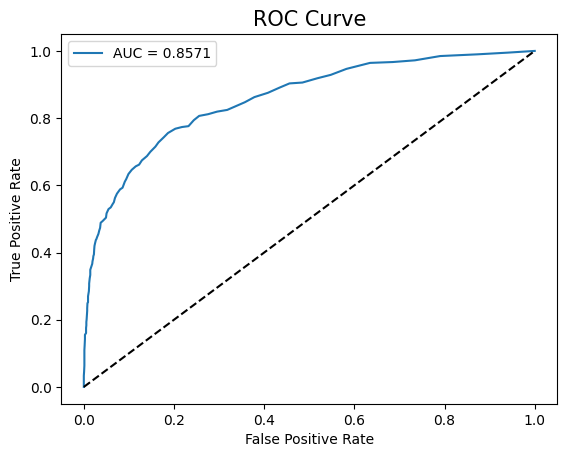

In [25]:
y_pred_proba = random_forest.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [26]:
# XGBoost Classifier 

y_pred = xgb.predict(X_test)

print("Classification Report : \n", classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.861')

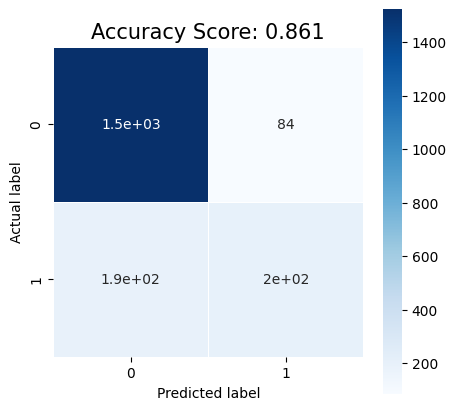

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

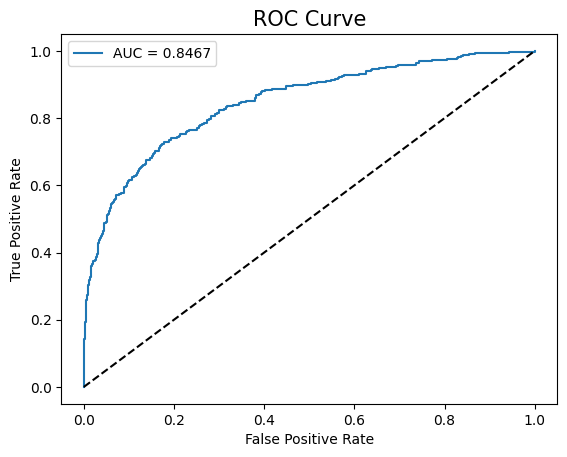

In [28]:
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Conclusion

### Conclusion is Churn Data is imabalnced. So Now handle the imblance dataset 

## technique 1 : Resample Training Set

In [29]:
from sklearn.utils import resample

majority_churn = df[df['Exited']==0]
minority_churn = df[df['Exited']==1]

majority_downsample = resample(majority_churn, replace=False, n_samples=minority_churn.shape[0], random_state=42)

df = pd.concat([majority_downsample, minority_churn])

df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
3961,535,0,1,47,0,160729.10,1,0,1,145986.35,0
2503,527,0,1,32,0,0.00,1,1,0,109523.88,0
5782,636,1,1,36,6,96643.32,1,0,0,182059.28,0


In [30]:
df['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [31]:
def confusion_matrix_display(data_cm, model):
    plt.figure(figsize=(5,5))
    sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
    plt.title(all_sample_title, size = 15)

In [32]:
def model_train_and_predict(X_train, y_train, X_test, y_test):
    # Decision Tree Classifier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    cm_dt = confusion_matrix(y_test, y_pred_dtc)
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])

    # Random Forest Classifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_test)
    cm_rf = confusion_matrix(y_test, y_pred_rfc)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

    # XGBoost Classifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    proba_xgb = xgb_clf.predict_proba(X_test)
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, proba_xgb[:,1])

    # Plot ROC curves
    plt.figure()
    plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
    plt.plot(fpr_rf, tpr_rf, label='Random Forest')
    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

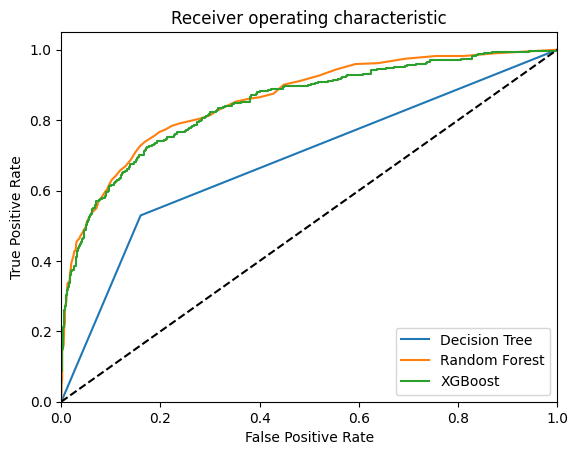

In [33]:
model_train_and_predict(X_train, y_train, X_test, y_test)